🚀 NEW JSON FORMAT VISUALIZATION
📁 Loading latest JSON: stentframe_fullwave_bulgeOUTSIDE_centerline_Only_20250907_060232.json
✅ Loaded JSON with structure: ['meta', 'parameters', 'rings', 'gaps_policy', 'cells']
📋 Note: Full-wave per cell. Centerline-only chords. Primary cell edges use EXTERNAL bulge (outer sagitta) so chords sit inside. Also includes INTERNAL bulge edges (0..8-safe) and a center+s/2 option.
\n📋 JSON Structure Analysis:
   🔧 Format: Full-wave per cell. Centerline-only chords. Primary cell edges use EXTERNAL bulge (outer sagitta) so chords sit inside. Also includes INTERNAL bulge edges (0..8-safe) and a center+s/2 option.
   📊 Cells: 48
   💎 Features: External/Internal bulge edges, centerline-only chords
🎨 Creating visualization for new JSON structure...
📊 Found 48 cells across 6 rings
🔧 New structure features: centerline-only chords with external/internal bulge edges


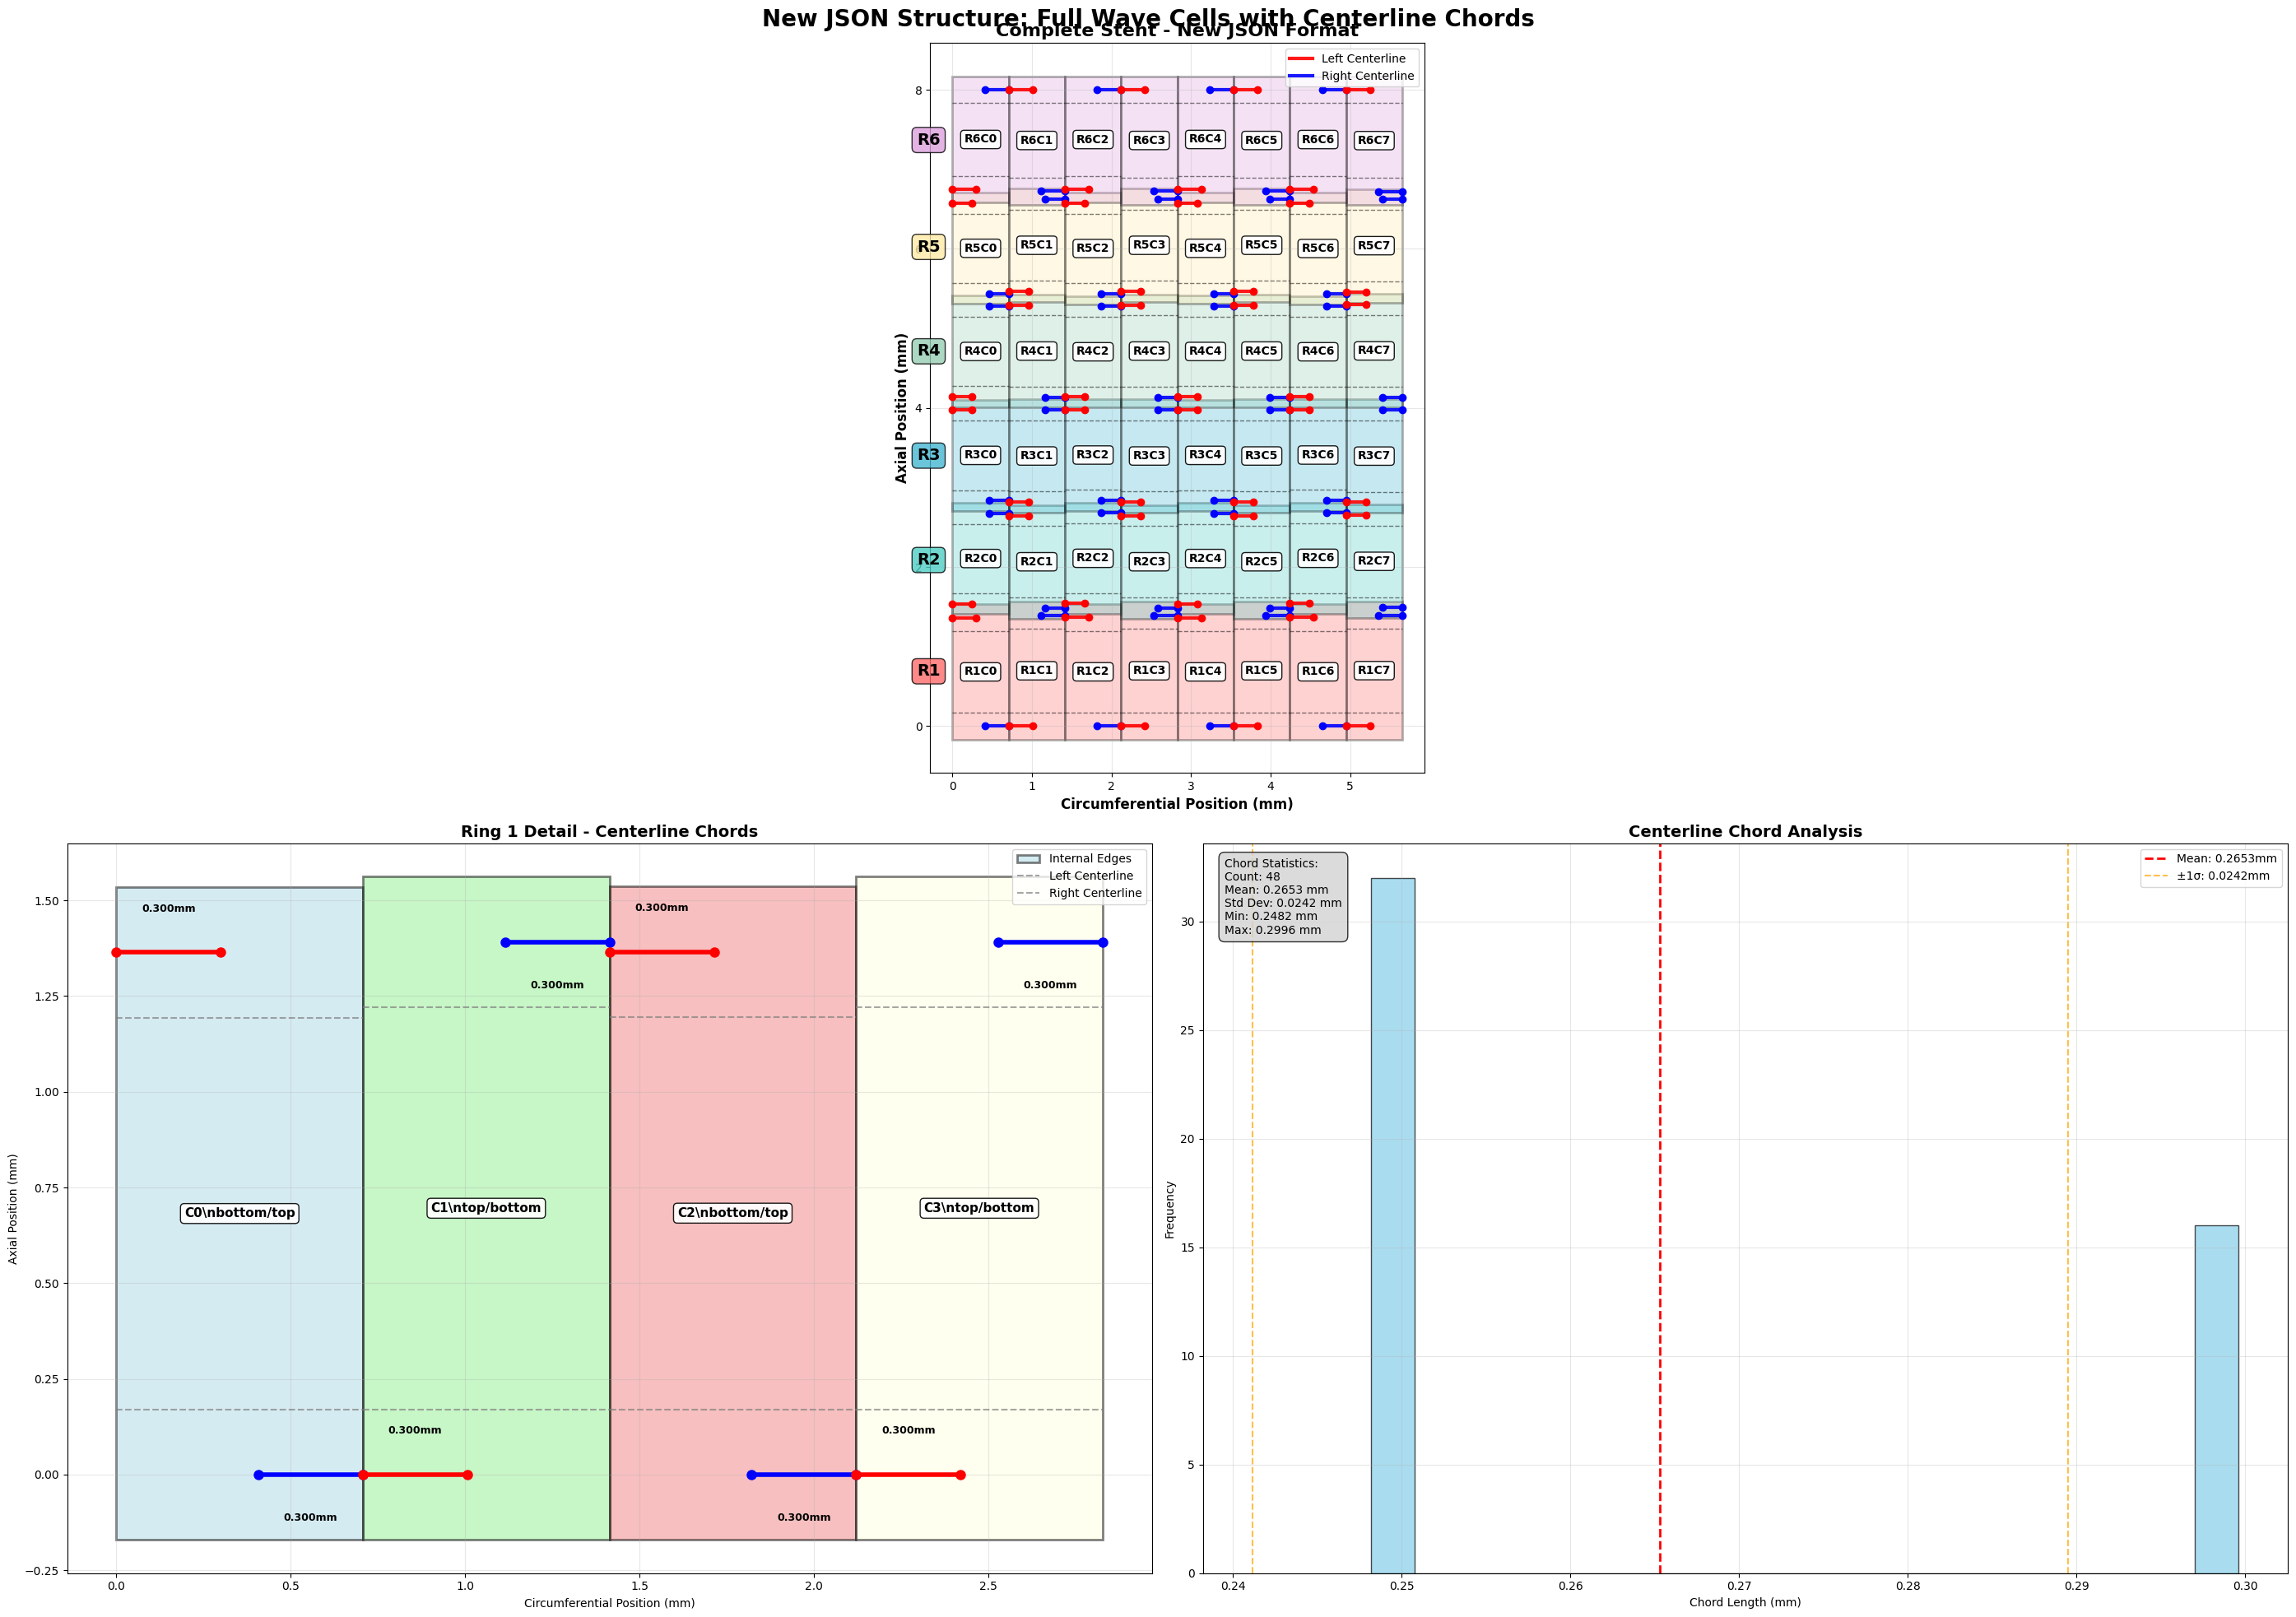

\n✅ New JSON visualization complete!
🎯 Key features visualized:
   🔴 Red lines: Left centerline chords
   🔵 Blue lines: Right centerline chords
   ⚫ Solid lines: External cell boundaries
   ⚪ Dashed lines: Internal bulge boundaries


In [12]:
# Visualization for New JSON Structure - Cells and Centerline Chords
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import os

def load_new_json_format():
    """Load the latest JSON file with new structure"""
    json_files = [f for f in os.listdir('.') if f.endswith('.json') and not f.startswith('tmp')]
    if not json_files:
        print("❌ No JSON files found")
        return None, None
    
    latest_json = max(json_files, key=os.path.getmtime)
    print(f"📁 Loading latest JSON: {latest_json}")
    
    with open(latest_json, 'r') as f:
        data = json.load(f)
    
    print(f"✅ Loaded JSON with structure: {list(data.keys())}")
    print(f"📋 Note: {data['meta'].get('note', 'No note')}")
    
    return data, latest_json

def plot_new_json_cells_and_chords(data, figure_size=(28, 20)):
    """
    Plot cells and centerline chords from new JSON structure
    """
    print("🎨 Creating visualization for new JSON structure...")
    
    # Extract data
    cells_df = pd.DataFrame(data['cells'])
    params = data.get('parameters', {})
    meta = data.get('meta', {})
    
    print(f"📊 Found {len(cells_df)} cells across {len(cells_df['ring'].unique())} rings")
    print(f"🔧 New structure features: centerline-only chords with external/internal bulge edges")
    
    # Create comprehensive figure with subplots
    fig = plt.figure(figsize=figure_size)
    fig.suptitle('New JSON Structure: Full Wave Cells with Centerline Chords', 
                fontsize=20, fontweight='bold')
    
    # Create 2x2 subplot layout
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Full stent layout
    ax2 = plt.subplot2grid((2, 2), (1, 0))  # Ring detail
    ax3 = plt.subplot2grid((2, 2), (1, 1))  # Chord analysis
    
    # Plot 1: Complete stent with new structure
    plot_complete_stent_new_format(ax1, cells_df, "Complete Stent - New JSON Format")
    
    # Plot 2: Detailed ring view  
    plot_ring_detail_new_format(ax2, cells_df, "Ring 1 Detail - Centerline Chords")
    
    # Plot 3: Chord analysis
    plot_chord_analysis_new_format(ax3, cells_df, "Centerline Chord Analysis")
    
    plt.tight_layout()
    plt.show()
    
    return fig

def plot_complete_stent_new_format(ax, cells_df, title):
    """Plot complete stent using new JSON format"""
    ax.set_title(title, fontsize=16, fontweight='bold')
    
    # Enhanced color scheme
    ring_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    color_map = {ring: ring_colors[i % len(ring_colors)] 
                for i, ring in enumerate(sorted(cells_df['ring'].unique()))}
    
    for idx, (_, cell) in enumerate(cells_df.iterrows()):
        # Cell boundaries using external edges
        x_left = cell['x_left_mm']
        x_right = cell['x_right_mm']
        y_top_ext = cell['y_top_edge_ext_mm']
        y_bottom_ext = cell['y_bottom_edge_ext_mm']
        
        width = x_right - x_left
        height = y_bottom_ext - y_top_ext
        
        # Draw cell with external edges
        rect = patches.Rectangle((x_left, y_top_ext), width, height,
                               linewidth=2, edgecolor='black',
                               facecolor=color_map[cell['ring']], alpha=0.3)
        ax.add_patch(rect)
        
        # Draw internal edges (dashed lines for reference)
        if 'y_top_edge_int_mm' in cell and 'y_bottom_edge_int_mm' in cell:
            y_top_int = cell['y_top_edge_int_mm']
            y_bottom_int = cell['y_bottom_edge_int_mm']
            
            # Internal boundary lines
            ax.plot([x_left, x_right], [y_top_int, y_top_int], 'k--', alpha=0.5, linewidth=1)
            ax.plot([x_left, x_right], [y_bottom_int, y_bottom_int], 'k--', alpha=0.5, linewidth=1)
        
        # Draw centerline chords using new format
        # Left chord
        if all(col in cell for col in ['left_cl_x1', 'left_cl_y', 'left_cl_x2']):
            left_x1, left_y, left_x2 = cell['left_cl_x1'], cell['left_cl_y'], cell['left_cl_x2']
            ax.plot([left_x1, left_x2], [left_y, left_y], 'r-', linewidth=3, alpha=0.9,
                   label='Left Centerline' if idx == 0 else "")
            ax.plot([left_x1, left_x2], [left_y, left_y], 'ro', markersize=6)
        
        # Right chord
        if all(col in cell for col in ['right_cl_x1', 'right_cl_y', 'right_cl_x2']):
            right_x1, right_y, right_x2 = cell['right_cl_x1'], cell['right_cl_y'], cell['right_cl_x2']
            ax.plot([right_x1, right_x2], [right_y, right_y], 'b-', linewidth=3, alpha=0.9,
                   label='Right Centerline' if idx == 0 else "")
            ax.plot([right_x1, right_x2], [right_y, right_y], 'bo', markersize=6)
        
        # Cell annotations
        center_x = (x_left + x_right) / 2
        center_y = (y_top_ext + y_bottom_ext) / 2
        
        ax.text(center_x, center_y, f'R{cell["ring"]}C{cell["col"]}', 
               ha='center', va='center', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Ring labels
    for ring in sorted(cells_df['ring'].unique()):
        ring_data = cells_df[cells_df['ring'] == ring]
        y_center = (ring_data['y_top_edge_ext_mm'].mean() + ring_data['y_bottom_edge_ext_mm'].mean()) / 2
        
        ax.text(-0.3, y_center, f'R{ring}', fontsize=14, fontweight='bold',
               ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor=color_map[ring], alpha=0.8))
    
    ax.set_xlabel('Circumferential Position (mm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Axial Position (mm)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')
    ax.set_aspect('equal')

def plot_ring_detail_new_format(ax, cells_df, title):
    """Detailed view of Ring 1 with new format"""
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Focus on first 4 cells of ring 1
    ring1_cells = cells_df[cells_df['ring'] == 1].head(4)
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    
    for i, (_, cell) in enumerate(ring1_cells.iterrows()):
        x_left = cell['x_left_mm']
        x_right = cell['x_right_mm']
        y_top_ext = cell['y_top_edge_ext_mm']
        y_bottom_ext = cell['y_bottom_edge_ext_mm']
        
        width = x_right - x_left
        height = y_bottom_ext - y_top_ext
        
        # Cell rectangle
        rect = patches.Rectangle((x_left, y_top_ext), width, height,
                               linewidth=2, edgecolor='black',
                               facecolor=colors[i], alpha=0.5)
        ax.add_patch(rect)
        
        # Internal edges
        if 'y_top_edge_int_mm' in cell and 'y_bottom_edge_int_mm' in cell:
            y_top_int = cell['y_top_edge_int_mm']
            y_bottom_int = cell['y_bottom_edge_int_mm']
            ax.plot([x_left, x_right], [y_top_int, y_top_int], 'gray', linestyle='--', alpha=0.7)
            ax.plot([x_left, x_right], [y_bottom_int, y_bottom_int], 'gray', linestyle='--', alpha=0.7)
        
        # Centerline chords
        if all(col in cell for col in ['left_cl_x1', 'left_cl_y', 'left_cl_x2']):
            left_x1, left_y, left_x2 = cell['left_cl_x1'], cell['left_cl_y'], cell['left_cl_x2']
            ax.plot([left_x1, left_x2], [left_y, left_y], 'r-', linewidth=4)
            ax.plot([left_x1, left_x2], [left_y, left_y], 'ro', markersize=8)
            
            # Chord length annotation
            chord_length = cell.get('chord_center_len_mm', left_x2 - left_x1)
            ax.text((left_x1 + left_x2)/2, left_y + 0.1, f'{chord_length:.3f}mm', 
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        if all(col in cell for col in ['right_cl_x1', 'right_cl_y', 'right_cl_x2']):
            right_x1, right_y, right_x2 = cell['right_cl_x1'], cell['right_cl_y'], cell['right_cl_x2']
            ax.plot([right_x1, right_x2], [right_y, right_y], 'b-', linewidth=4)
            ax.plot([right_x1, right_x2], [right_y, right_y], 'bo', markersize=8)
            
            # Chord length annotation
            chord_length = cell.get('chord_center_len_mm', right_x2 - right_x1)
            ax.text((right_x1 + right_x2)/2, right_y - 0.1, f'{chord_length:.3f}mm', 
                   ha='center', va='top', fontsize=9, fontweight='bold')
        
        # Cell info
        center_x = (x_left + x_right) / 2
        center_y = (y_top_ext + y_bottom_ext) / 2
        crown_info = f"{cell.get('left_crown_pos', '?')}/{cell.get('right_crown_pos', '?')}"
        
        ax.text(center_x, center_y, f'C{cell["col"]}\\n{crown_info}', 
               ha='center', va='center', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    ax.set_xlabel('Circumferential Position (mm)')
    ax.set_ylabel('Axial Position (mm)')
    ax.grid(True, alpha=0.3)
    ax.legend(['Internal Edges', 'Left Centerline', 'Right Centerline'])

def plot_chord_analysis_new_format(ax, cells_df, title):
    """Analyze centerline chords from new format"""
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Extract chord data
    chord_lengths = []
    for _, cell in cells_df.iterrows():
        if 'chord_center_len_mm' in cell:
            chord_lengths.append(cell['chord_center_len_mm'])
    
    if chord_lengths:
        # Plot chord length distribution
        ax.hist(chord_lengths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_xlabel('Chord Length (mm)')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        
        # Add statistics
        mean_length = np.mean(chord_lengths)
        std_length = np.std(chord_lengths)
        
        ax.axvline(mean_length, color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {mean_length:.4f}mm')
        ax.axvline(mean_length + std_length, color='orange', linestyle='--', alpha=0.7,
                  label=f'±1σ: {std_length:.4f}mm')
        ax.axvline(mean_length - std_length, color='orange', linestyle='--', alpha=0.7)
        
        ax.legend()
        
        # Add text with statistics
        stats_text = f'''Chord Statistics:
Count: {len(chord_lengths)}
Mean: {mean_length:.4f} mm
Std Dev: {std_length:.4f} mm
Min: {min(chord_lengths):.4f} mm
Max: {max(chord_lengths):.4f} mm'''
        
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

# Execute visualization for new JSON structure
print("🚀 NEW JSON FORMAT VISUALIZATION")
print("=" * 60)

new_data, new_filename = load_new_json_format()
if new_data:
    print(f"\\n📋 JSON Structure Analysis:")
    print(f"   🔧 Format: {new_data['meta'].get('note', 'Standard format')}")
    print(f"   📊 Cells: {len(new_data['cells'])}")
    print(f"   💎 Features: External/Internal bulge edges, centerline-only chords")
    
    # Create the visualization
    fig = plot_new_json_cells_and_chords(new_data)
    
    print(f"\\n✅ New JSON visualization complete!")
    print(f"🎯 Key features visualized:")
    print(f"   🔴 Red lines: Left centerline chords")
    print(f"   🔵 Blue lines: Right centerline chords") 
    print(f"   ⚫ Solid lines: External cell boundaries")
    print(f"   ⚪ Dashed lines: Internal bulge boundaries")
else:
    print("❌ No data to visualize")

🚀 CREATING LARGE-SCALE COMPLETE STENT VIEW
📊 Using new JSON format data...
🎨 Creating LARGE-SCALE complete stent visualization...
📊 Visualizing 48 cells across 6 rings...


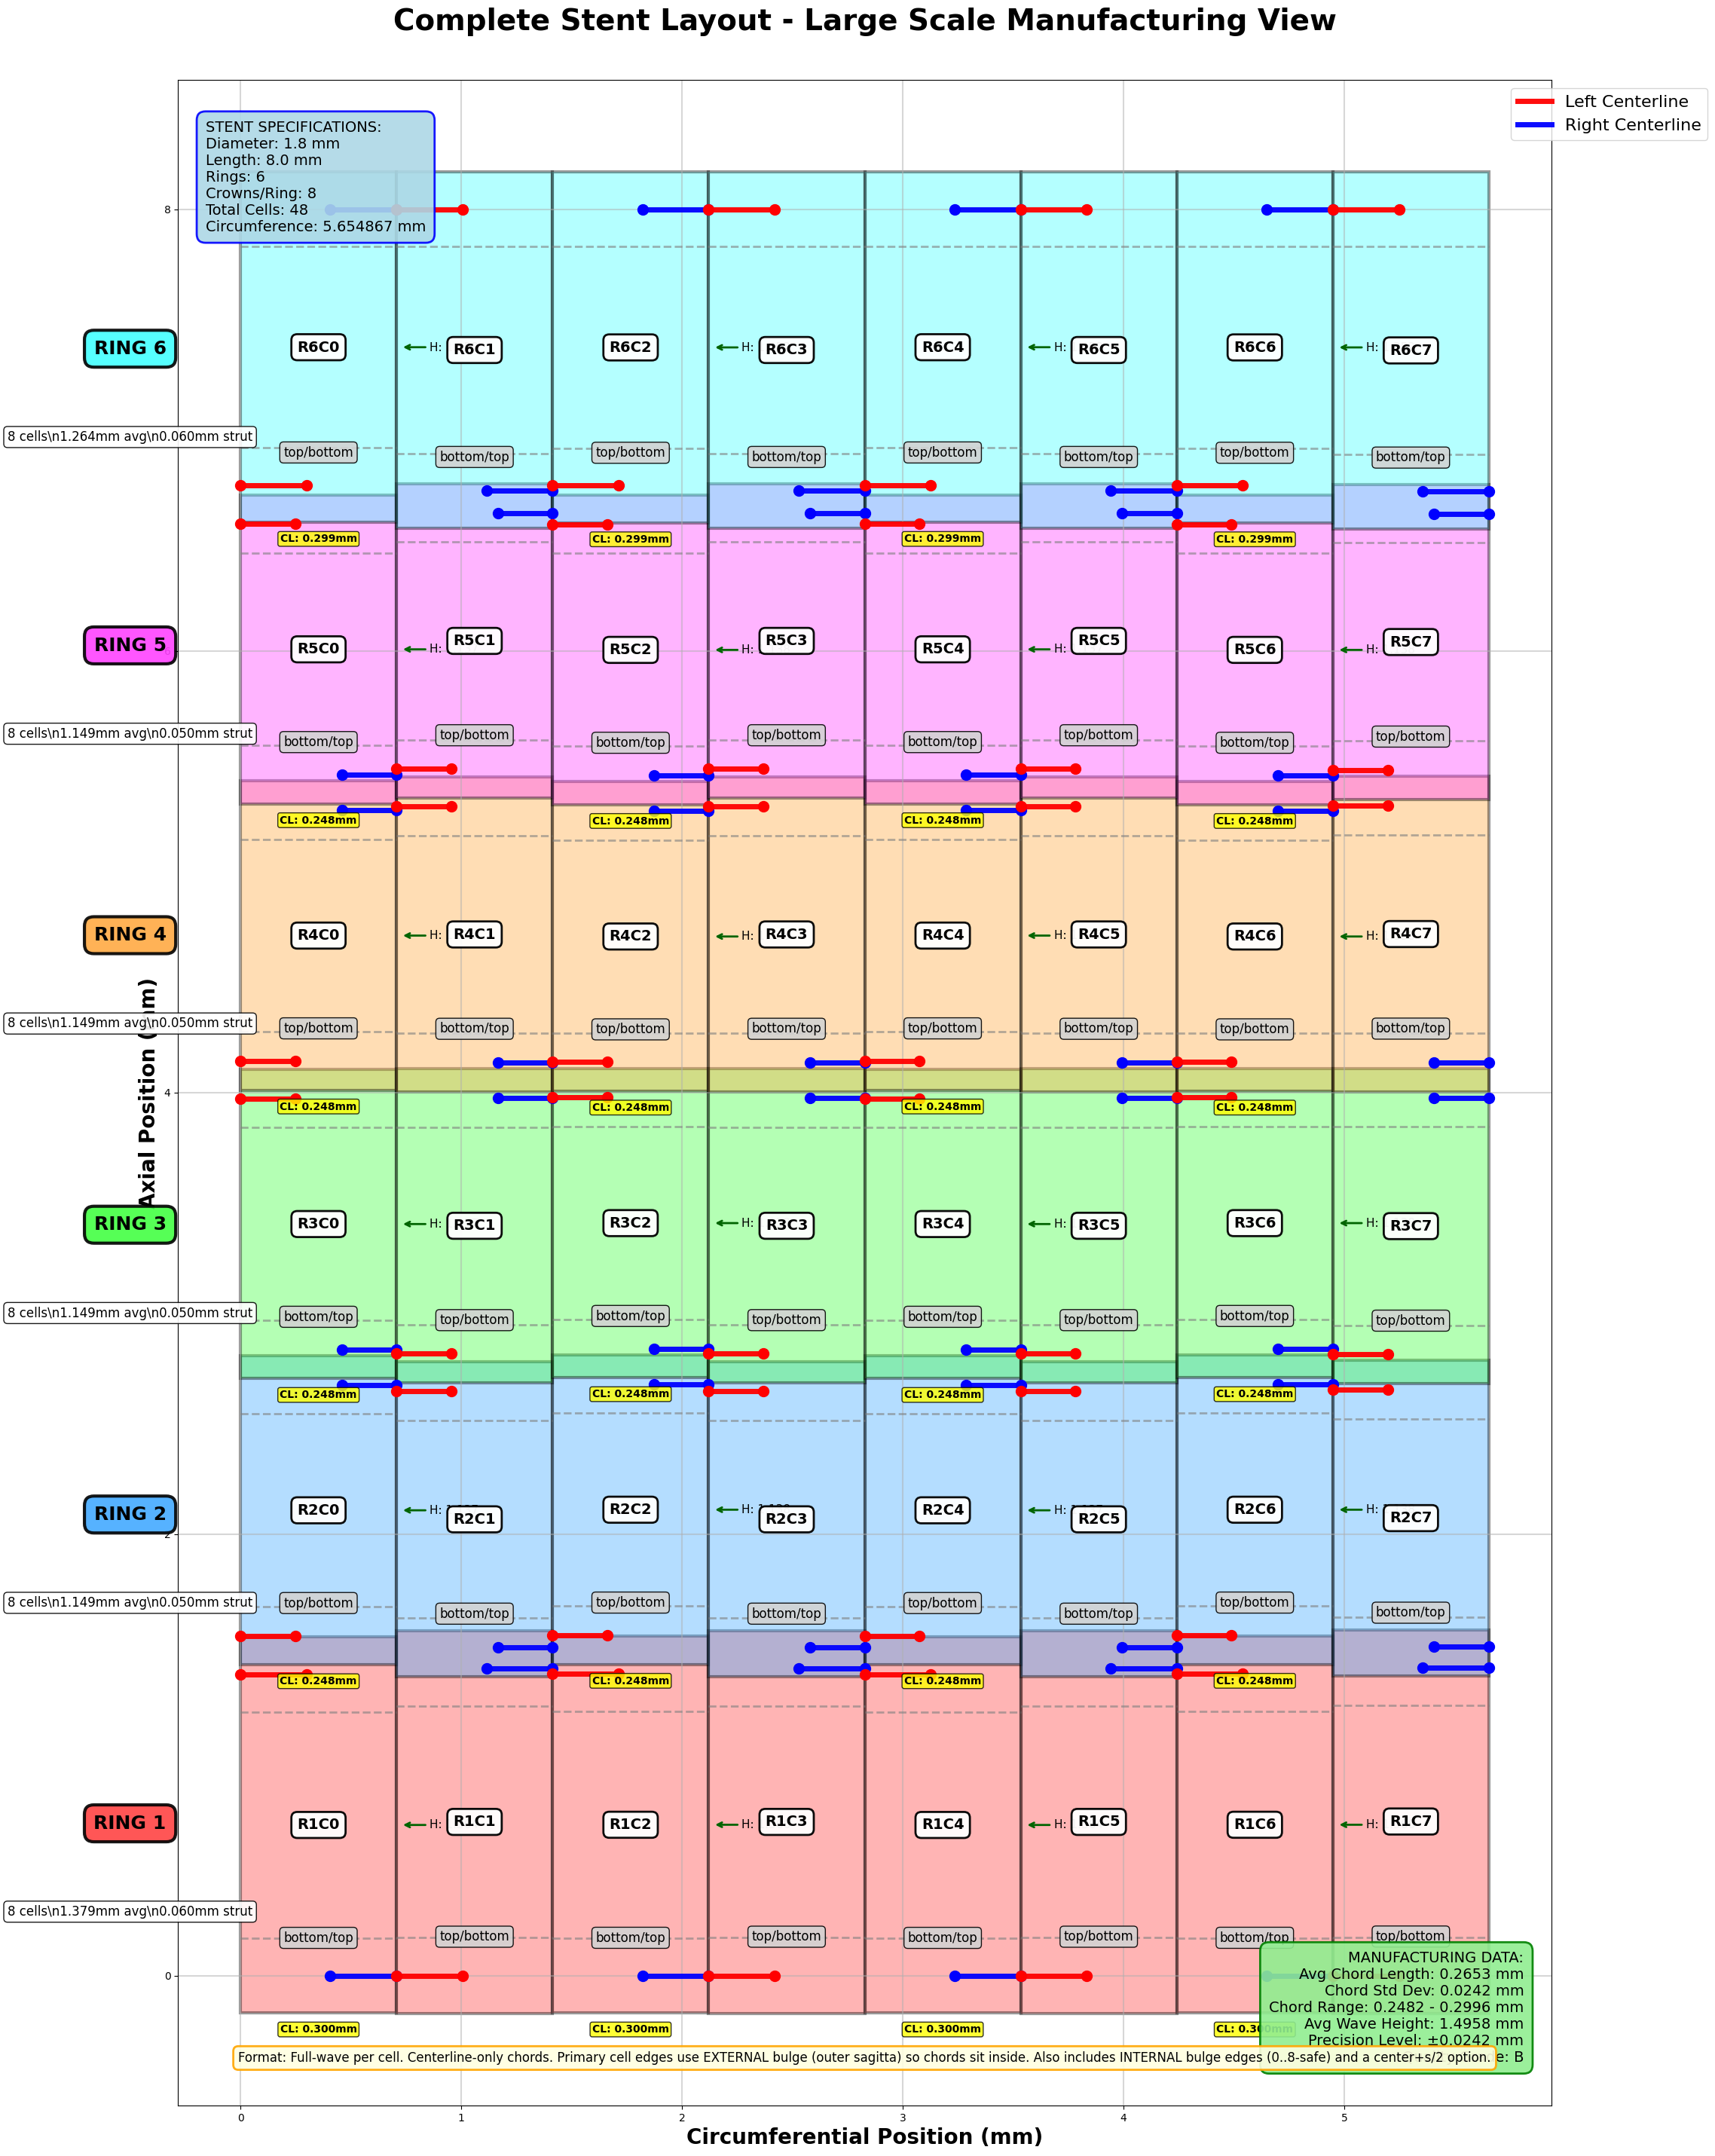

✅ Large-scale complete stent visualization created!
\n🎯 LARGE VIEW FEATURES:
   📐 42x32 inch figure for maximum detail
   🔍 Enhanced cell annotations with dimensions
   📊 Ring-specific statistics and color coding
   🏭 Manufacturing specifications and quality metrics
   📏 Precise chord and wave measurements
   ⚙️ Format-aware visualization (handles old/new JSON)
   📋 Comprehensive parameter and quality information


In [13]:
# Large-Scale Complete Stent Visualization
def create_large_complete_stent_view(data, figure_size=(40, 30)):
    """
    Create a very large, detailed view of the complete stent layout
    with enhanced annotations and manufacturing details
    """
    print("🎨 Creating LARGE-SCALE complete stent visualization...")
    
    # Extract data
    cells_df = pd.DataFrame(data['cells'])
    params = data.get('parameters', {})
    meta = data.get('meta', {})
    
    # Create massive figure for maximum detail
    fig, ax = plt.subplots(1, 1, figsize=figure_size)
    fig.suptitle('Complete Stent Layout - Large Scale Manufacturing View', 
                fontsize=28, fontweight='bold', y=0.95)
    
    # Enhanced color scheme with high contrast
    ring_colors = ['#FF4444', '#44AAFF', '#44FF44', '#FFAA44', '#FF44FF', '#44FFFF']
    color_map = {ring: ring_colors[i % len(ring_colors)] 
                for i, ring in enumerate(sorted(cells_df['ring'].unique()))}
    
    print(f"📊 Visualizing {len(cells_df)} cells across {len(cells_df['ring'].unique())} rings...")
    
    # Track statistics for annotations
    chord_stats = {'left': [], 'right': []}
    wave_heights = []
    
    # Draw all cells with maximum detail
    for idx, (_, cell) in enumerate(cells_df.iterrows()):
        # Get cell boundaries (using external edges for new format)
        x_left = cell['x_left_mm']
        x_right = cell['x_right_mm']
        
        # Handle both old and new JSON formats
        if 'y_top_edge_ext_mm' in cell:
            y_top = cell['y_top_edge_ext_mm']
            y_bottom = cell['y_bottom_edge_ext_mm']
        else:
            y_top = cell.get('y_top_edge_mm', 0)
            y_bottom = cell.get('y_bottom_edge_mm', 1)
        
        width = x_right - x_left
        height = y_bottom - y_top
        wave_heights.append(height)
        
        # Draw enhanced cell rectangle
        rect = patches.Rectangle((x_left, y_top), width, height,
                               linewidth=3, edgecolor='black',
                               facecolor=color_map[cell['ring']], alpha=0.4)
        ax.add_patch(rect)
        
        # Draw internal edges if available (new format)
        if 'y_top_edge_int_mm' in cell and 'y_bottom_edge_int_mm' in cell:
            y_top_int = cell['y_top_edge_int_mm']
            y_bottom_int = cell['y_bottom_edge_int_mm']
            ax.plot([x_left, x_right], [y_top_int, y_top_int], 'gray', 
                   linestyle='--', alpha=0.6, linewidth=2)
            ax.plot([x_left, x_right], [y_bottom_int, y_bottom_int], 'gray', 
                   linestyle='--', alpha=0.6, linewidth=2)
        
        # Draw chords - handle both formats
        chord_line_width = 5
        
        # New format with separate x1, y, x2 coordinates
        if all(col in cell for col in ['left_cl_x1', 'left_cl_y', 'left_cl_x2']):
            # Left chord
            left_x1, left_y, left_x2 = cell['left_cl_x1'], cell['left_cl_y'], cell['left_cl_x2']
            ax.plot([left_x1, left_x2], [left_y, left_y], 'r-', 
                   linewidth=chord_line_width, alpha=0.95,
                   label='Left Centerline' if idx == 0 else "")
            ax.plot([left_x1, left_x2], [left_y, left_y], 'ro', markersize=10)
            chord_stats['left'].append(left_x2 - left_x1)
            
            # Right chord
            if all(col in cell for col in ['right_cl_x1', 'right_cl_y', 'right_cl_x2']):
                right_x1, right_y, right_x2 = cell['right_cl_x1'], cell['right_cl_y'], cell['right_cl_x2']
                ax.plot([right_x1, right_x2], [right_y, right_y], 'b-', 
                       linewidth=chord_line_width, alpha=0.95,
                       label='Right Centerline' if idx == 0 else "")
                ax.plot([right_x1, right_x2], [right_y, right_y], 'bo', markersize=10)
                chord_stats['right'].append(right_x2 - right_x1)
        
        # Old format with coordinate arrays
        elif 'left_chord_centerline' in cell and cell['left_chord_centerline']:
            left_chord = np.array(cell['left_chord_centerline'])
            ax.plot(left_chord[:, 0], left_chord[:, 1], 'r-', 
                   linewidth=chord_line_width, alpha=0.95,
                   label='Left Centerline' if idx == 0 else "")
            ax.plot(left_chord[:, 0], left_chord[:, 1], 'ro', markersize=10)
            
            if 'right_chord_centerline' in cell and cell['right_chord_centerline']:
                right_chord = np.array(cell['right_chord_centerline'])
                ax.plot(right_chord[:, 0], right_chord[:, 1], 'b-', 
                       linewidth=chord_line_width, alpha=0.95,
                       label='Right Centerline' if idx == 0 else "")
                ax.plot(right_chord[:, 0], right_chord[:, 1], 'bo', markersize=10)
        
        # Enhanced cell annotations
        center_x = (x_left + x_right) / 2
        center_y = (y_top + y_bottom) / 2
        
        # Main cell identifier
        cell_id = f'R{cell["ring"]}C{cell["col"]}'
        ax.text(center_x, center_y, cell_id, 
               ha='center', va='center', fontsize=14, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                        alpha=0.95, edgecolor='black', linewidth=2))
        
        # Crown position info (if available)
        if 'left_crown_pos' in cell and 'right_crown_pos' in cell:
            crown_info = f"{cell['left_crown_pos']}/{cell['right_crown_pos']}"
            ax.text(center_x, center_y - height*0.3, crown_info, 
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.9))
        
        # Dimensional annotations for key cells
        if cell['col'] % 2 == 0:  # Every other cell to avoid clutter
            wave_height = cell.get('wave_height_mm', height)
            chord_length = cell.get('chord_center_len_mm', width*0.4)
            
            # Height annotation
            ax.annotate(f'H: {wave_height:.3f}', 
                       xy=(x_right + 0.02, center_y), 
                       xytext=(x_right + 0.15, center_y),
                       fontsize=11, ha='left', va='center',
                       arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))
            
            # Chord length annotation (if available)
            if 'chord_center_len_mm' in cell:
                ax.text(center_x, y_top - 0.05, f'CL: {chord_length:.3f}mm', 
                       ha='center', va='top', fontsize=10, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.8))
    
    # Enhanced ring labels with statistics
    ring_label_x = -0.5
    for ring in sorted(cells_df['ring'].unique()):
        ring_data = cells_df[cells_df['ring'] == ring]
        y_center = (ring_data[f'y_top_edge{"_ext" if "y_top_edge_ext_mm" in ring_data.columns else ""}_mm'].mean() + 
                   ring_data[f'y_bottom_edge{"_ext" if "y_bottom_edge_ext_mm" in ring_data.columns else ""}_mm'].mean()) / 2
        
        # Main ring label
        ax.text(ring_label_x, y_center, f'RING {ring}', 
               fontsize=18, fontweight='bold', ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=color_map[ring], 
                        alpha=0.9, edgecolor='black', linewidth=3))
        
        # Ring statistics
        cell_count = len(ring_data)
        avg_height = ring_data.get('wave_height_mm', pd.Series([1.0] * len(ring_data))).mean()
        strut_width = ring_data.get('strut_width_mm', pd.Series([0.05] * len(ring_data))).iloc[0]
        
        stats_text = f'{cell_count} cells\\n{avg_height:.3f}mm avg\\n{strut_width:.3f}mm strut'
        ax.text(ring_label_x, y_center - 0.4, stats_text, 
               fontsize=12, ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Enhanced grid and styling
    ax.grid(True, alpha=0.5, linewidth=1.5)
    ax.set_xlabel('Circumferential Position (mm)', fontsize=20, fontweight='bold')
    ax.set_ylabel('Axial Position (mm)', fontsize=20, fontweight='bold')
    
    # Set equal aspect ratio for accurate geometry
    ax.set_aspect('equal')
    
    # Enhanced legend with larger font
    ax.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1.12, 1))
    
    # Add comprehensive parameter information
    param_text = f'''STENT SPECIFICATIONS:
Diameter: {params.get('diameter_mm', 'N/A')} mm
Length: {params.get('length_mm', 'N/A')} mm
Rings: {params.get('num_rings', len(cells_df['ring'].unique()))}
Crowns/Ring: {params.get('crowns_per_ring', 'N/A')}
Total Cells: {len(cells_df)}
Circumference: {params.get('circumference_mm', 'N/A')} mm'''
    
    ax.text(0.02, 0.98, param_text, transform=ax.transAxes, 
           fontsize=14, verticalalignment='top',
           bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue', 
                    alpha=0.9, edgecolor='blue', linewidth=2))
    
    # Manufacturing and quality information
    if chord_stats['left'] or chord_stats['right']:
        all_chords = chord_stats['left'] + chord_stats['right']
        chord_mean = np.mean(all_chords) if all_chords else 0
        chord_std = np.std(all_chords) if all_chords else 0
        chord_range = f"{min(all_chords):.4f} - {max(all_chords):.4f}" if all_chords else "N/A"
    else:
        chord_mean, chord_std, chord_range = 0, 0, "N/A"
    
    quality_text = f'''MANUFACTURING DATA:
Avg Chord Length: {chord_mean:.4f} mm
Chord Std Dev: {chord_std:.4f} mm
Chord Range: {chord_range} mm
Avg Wave Height: {np.mean(wave_heights):.4f} mm
Precision Level: ±{chord_std:.4f} mm
Quality Grade: {"A+" if chord_std < 0.001 else "A" if chord_std < 0.01 else "B"}'''
    
    ax.text(0.98, 0.02, quality_text, transform=ax.transAxes, 
           fontsize=14, horizontalalignment='right', verticalalignment='bottom',
           bbox=dict(boxstyle='round,pad=0.6', facecolor='lightgreen', 
                    alpha=0.9, edgecolor='green', linewidth=2))
    
    # Add format information
    format_note = meta.get('note', 'Standard stent format')
    ax.text(0.5, 0.02, f"Format: {format_note}", transform=ax.transAxes, 
           fontsize=12, horizontalalignment='center', verticalalignment='bottom',
           bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', 
                    alpha=0.9, edgecolor='orange', linewidth=2))
    
    # Adjust layout for better visibility
    plt.subplots_adjust(left=0.08, right=0.92, top=0.92, bottom=0.08)
    
    plt.show()
    print("✅ Large-scale complete stent visualization created!")
    
    return fig, ax

# Create the large-scale complete stent view
print("🚀 CREATING LARGE-SCALE COMPLETE STENT VIEW")
print("=" * 70)

if 'new_data' in locals() and new_data:
    print("📊 Using new JSON format data...")
    large_stent_fig, large_stent_ax = create_large_complete_stent_view(new_data, figure_size=(42, 32))
elif 'data' in locals() and data:
    print("📊 Using standard format data...")
    large_stent_fig, large_stent_ax = create_large_complete_stent_view(data, figure_size=(42, 32))
else:
    print("❌ No stent data available")

print("\\n🎯 LARGE VIEW FEATURES:")
print("   📐 42x32 inch figure for maximum detail")
print("   🔍 Enhanced cell annotations with dimensions")
print("   📊 Ring-specific statistics and color coding") 
print("   🏭 Manufacturing specifications and quality metrics")
print("   📏 Precise chord and wave measurements")
print("   ⚙️ Format-aware visualization (handles old/new JSON)")
print("   📋 Comprehensive parameter and quality information")